In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid")

### 2.1

In [2]:
stock_df = pd.read_csv('week2.csv')
stock_df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,vwap,Day_Perc_Change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,...,336356,2.286158e+09,31377,154743,46.01,5,2017,6796.840000,0.000000,Slight or No change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,...,707624,4.884174e+09,49047,360641,50.97,5,2017,6868.268013,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,...,445461,3.087758e+09,65280,260033,58.37,5,2017,6887.209301,0.061116,Slight or No change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,...,406814,2.794684e+09,37063,188907,46.44,5,2017,6883.448643,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,...,552223,3.750475e+09,64293,234662,42.49,5,2017,6862.733353,-0.592881,Slight negative


In [3]:
stock_df['Date'] = stock_df['Date'].astype('datetime64[ns]')
stock_df.drop('Unnamed: 0',axis = 1,inplace=True)
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 20 columns):
Symbol                    494 non-null object
Series                    494 non-null object
Date                      494 non-null datetime64[ns]
Prev Close                494 non-null float64
Open Price                494 non-null float64
High Price                494 non-null float64
Low Price                 494 non-null float64
Last Price                494 non-null float64
Close Price               494 non-null float64
Average Price             494 non-null float64
Total Traded Quantity     494 non-null int64
Turnover                  494 non-null float64
No. of Trades             494 non-null int64
Deliverable Qty           494 non-null int64
% Dly Qt to Traded Qty    494 non-null float64
month                     494 non-null int64
year                      494 non-null int64
vwap                      494 non-null float64
Day_Perc_Change           494 non-null float64
Trend  

In [4]:
stock_df.set_index('Date',inplace=True)
stock_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,vwap,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,MARUTI,EQ,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,5,2017,6796.840000,0.000000,Slight or No change
2017-05-16,MARUTI,EQ,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,5,2017,6868.268013,1.905802,Positive
2017-05-17,MARUTI,EQ,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,5,2017,6887.209301,0.061116,Slight or No change
2017-05-18,MARUTI,EQ,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,5,2017,6883.448643,-1.827340,Negative
2017-05-19,MARUTI,EQ,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,5,2017,6862.733353,-0.592881,Slight negative


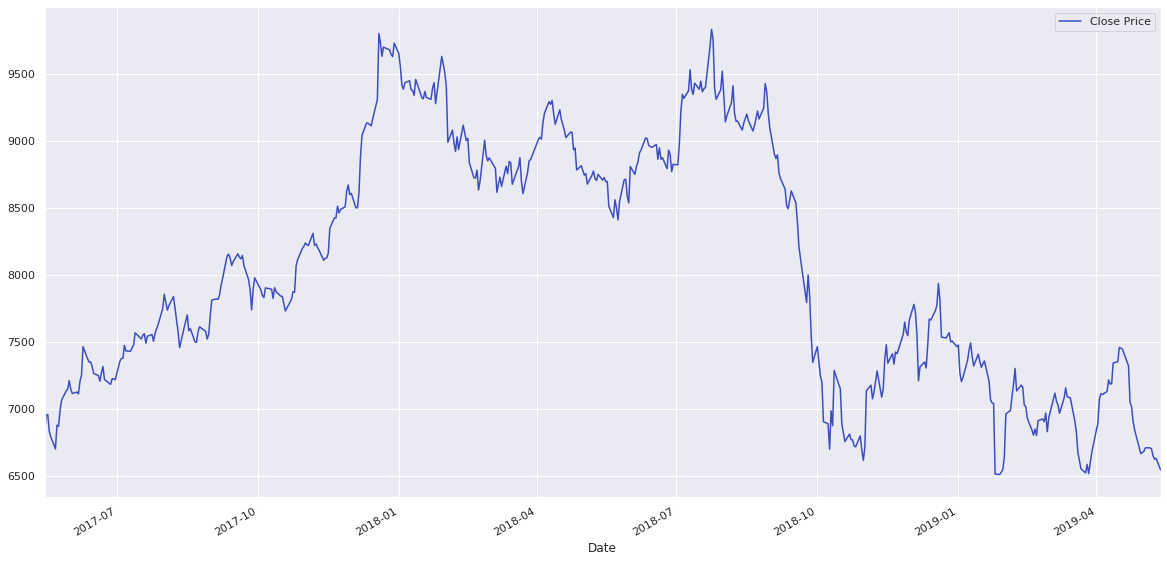

In [5]:
stock_df.plot(y='Close Price',colormap='coolwarm',figsize=(20,10),legend=True)

### 2.2

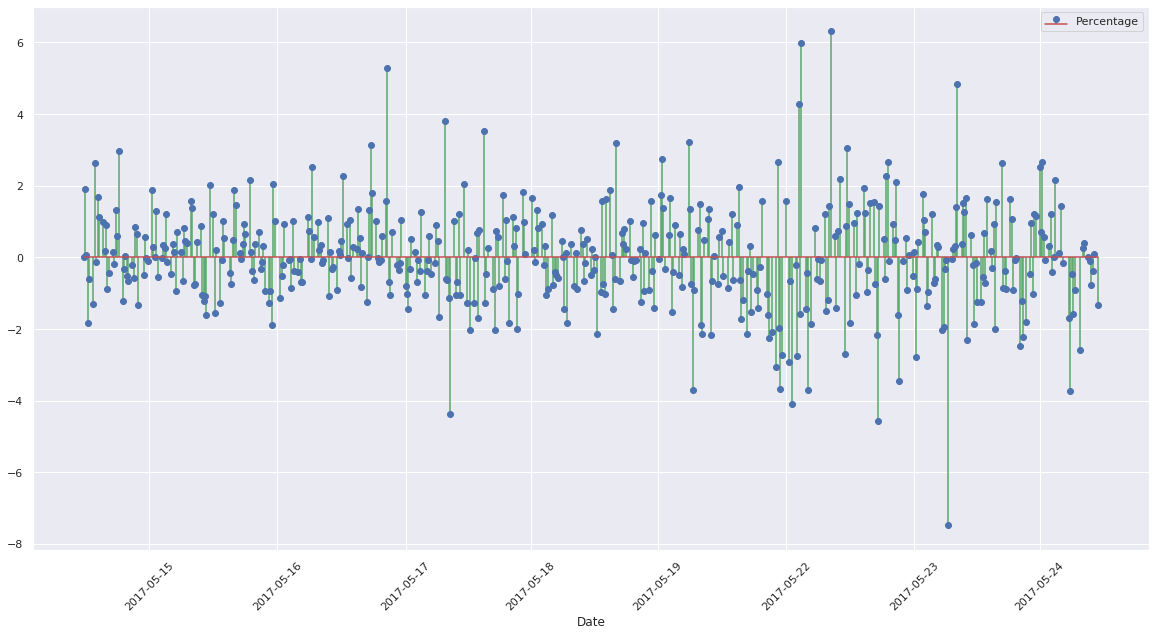

In [6]:
plt.figure(figsize=(20,10))
plt.stem(stock_df.index,stock_df['Day_Perc_Change'],'g',use_line_collection=True,markerfmt='bo',label='Percentage')
plt.xlabel("Date")
plt.legend()
plt.xticks(plt.xticks()[0], stock_df.index.date, rotation=45)
plt.show()

### 2.3

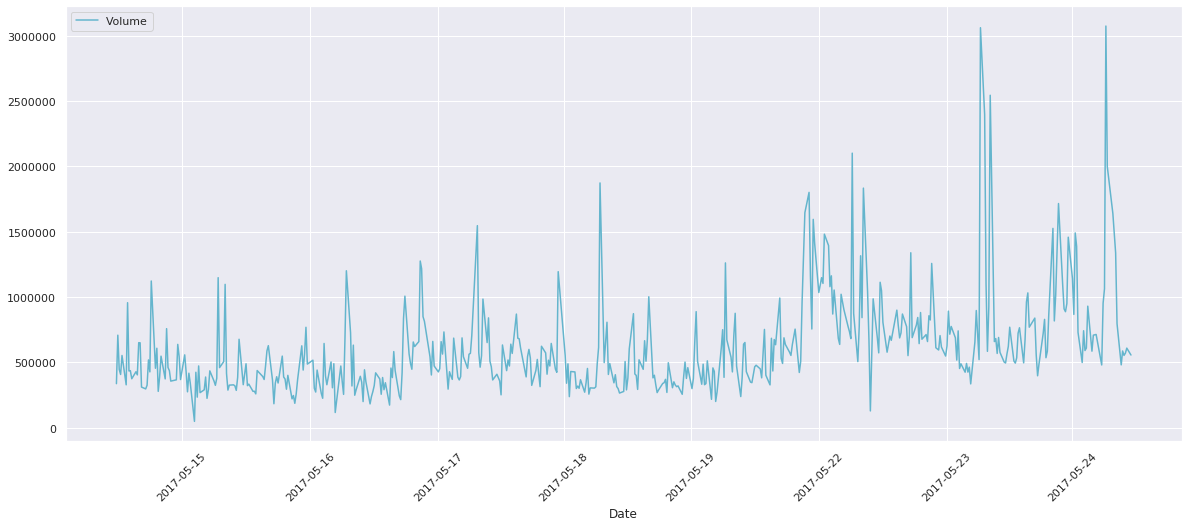

In [7]:
plt.figure(figsize=(20,8))
plt.plot(stock_df.index,stock_df['Total Traded Quantity'],'c',label='Volume')
plt.xlabel("Date")
plt.legend()
plt.xticks(plt.xticks()[0], stock_df.index.date, rotation=45)
plt.show()

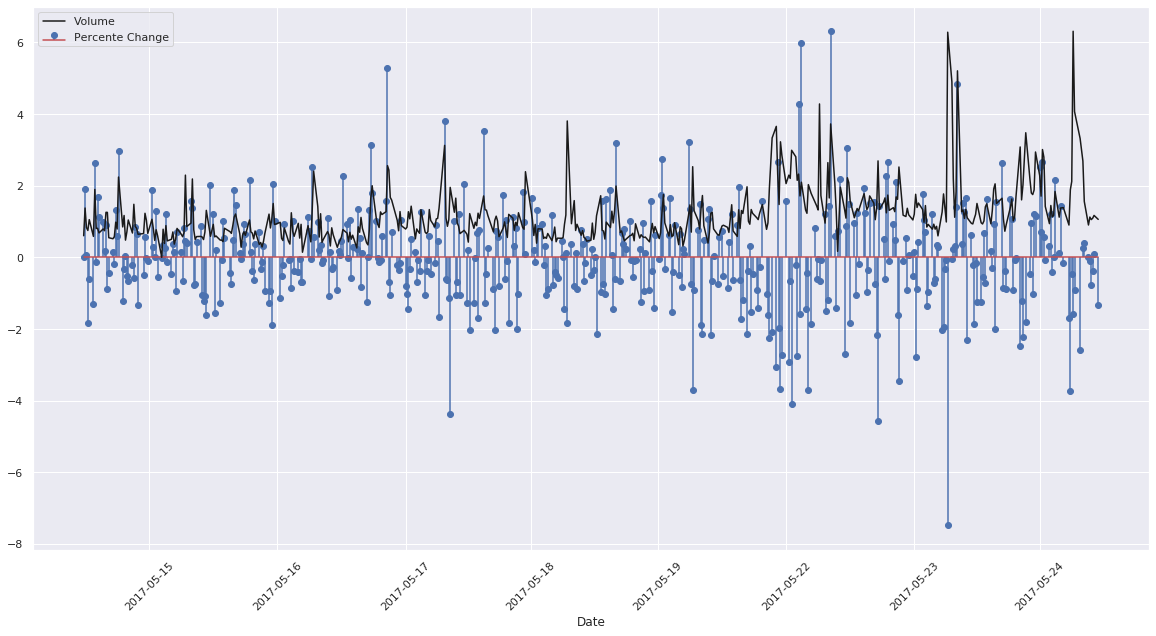

In [8]:
scaledvolume =  stock_df['Total Traded Quantity'] - stock_df['Total Traded Quantity'].min()
scaledvolume = scaledvolume/scaledvolume.max() * stock_df.Day_Perc_Change.max()

plt.figure(figsize=(20,10))

plt.stem(stock_df.index, stock_df.Day_Perc_Change , 'b', markerfmt='bo', label='Percente Change',use_line_collection = True,)
plt.plot(stock_df.index, scaledvolume, 'k', label='Volume')

plt.xlabel("Date")
plt.legend()

plt.xticks(plt.xticks()[0], stock_df.index.date, rotation=45)
plt.show()

#### Analysis of above graph:
The Percentage Change in Closing Price is directly proportional to the Volume i.e. the Total Traded Volume of that day. Therefore the closing prices greatly impacts the trade quantity of a particular stock.


### 2.4

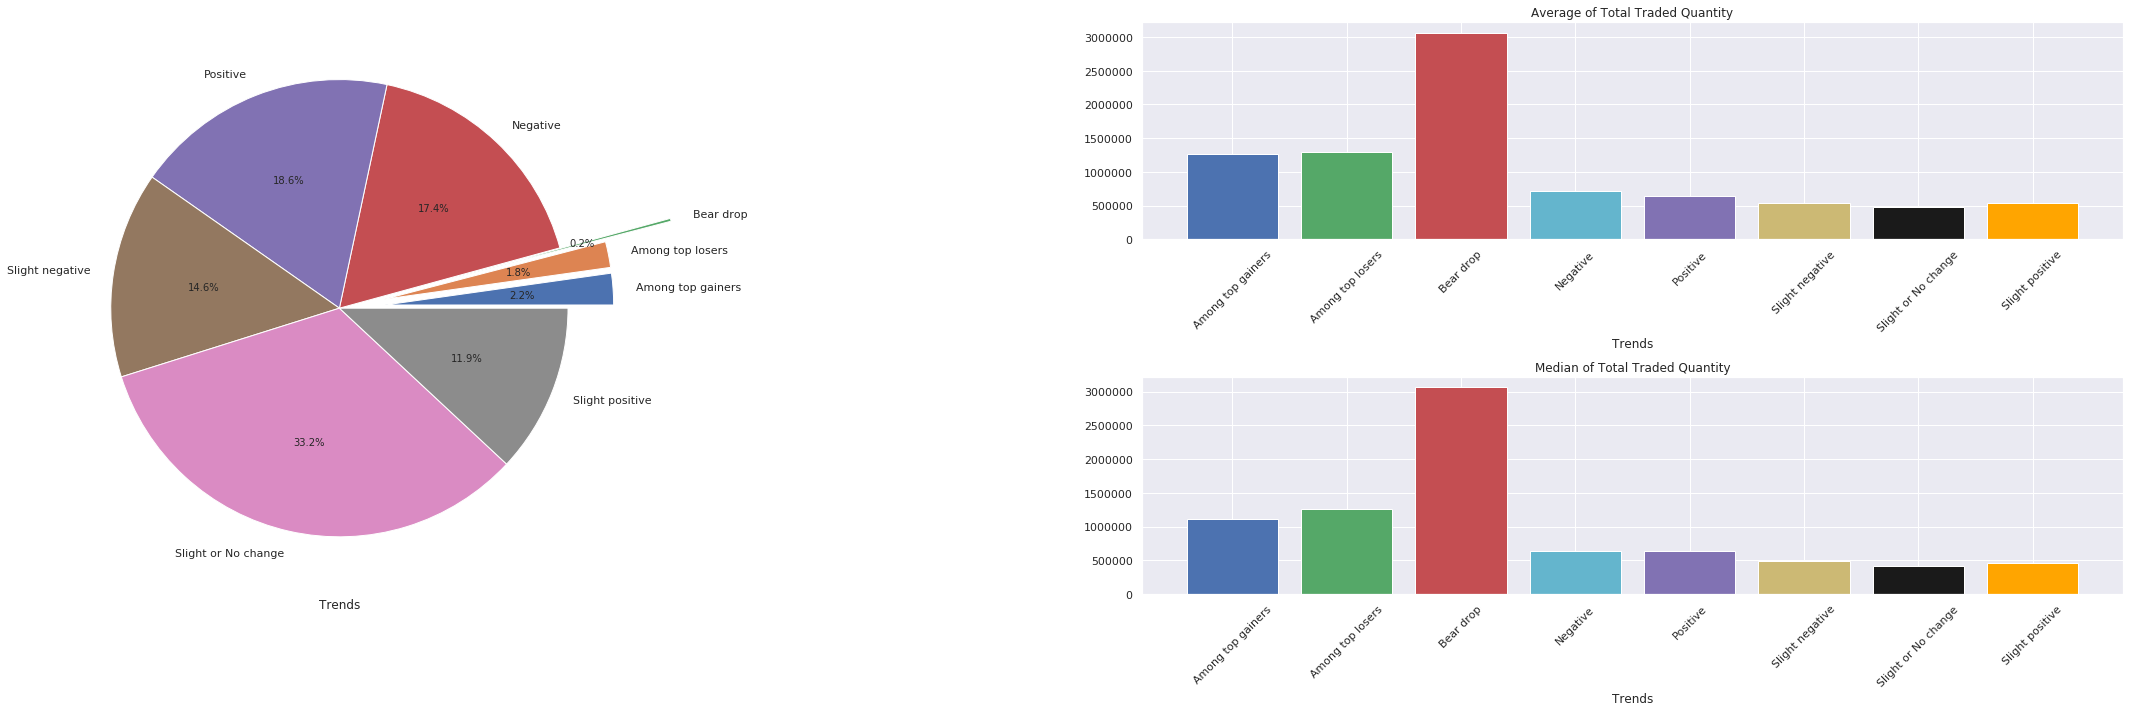

In [9]:
group = stock_df.groupby('Trend')
count = group.size()
avg_bar = group['Total Traded Quantity'].mean()
median_vol = group['Total Traded Quantity'].median()
color_list = ['b','g','r','c','m','y','k','orange']

gridsize = (2, 6)
fig = plt.figure(figsize=(30,10))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (0, 3), colspan=3)
ax3 = plt.subplot2grid(gridsize, (1, 3), colspan=3)

bar1 = ax2.bar(avg_bar.index,avg_bar,color = color_list)
ax2.set_ylabel('')
ax2.set_xlabel('Trends')
ax2.title.set_text('Average of Total Traded Quantity')
ax2.tick_params(axis='x', labelrotation=45)

bar2 = ax3.bar(median_vol.index,median_vol, color=color_list)
ax3.set_ylabel('') 
ax3.set_xlabel('Trends')
ax3.title.set_text('Median of Total Traded Quantity')
ax3.tick_params(axis='x', labelrotation=45)

explod = [0.2, 0.2, 0.5, 0, 0, 0, 0 ,0]
ax1.pie(count,labels=count.index,colors= color_list.reverse(),autopct='%1.1f%%', explode = explod)
ax1.set_xlabel('Trends')

plt.tight_layout()
plt.show()

### 2.5

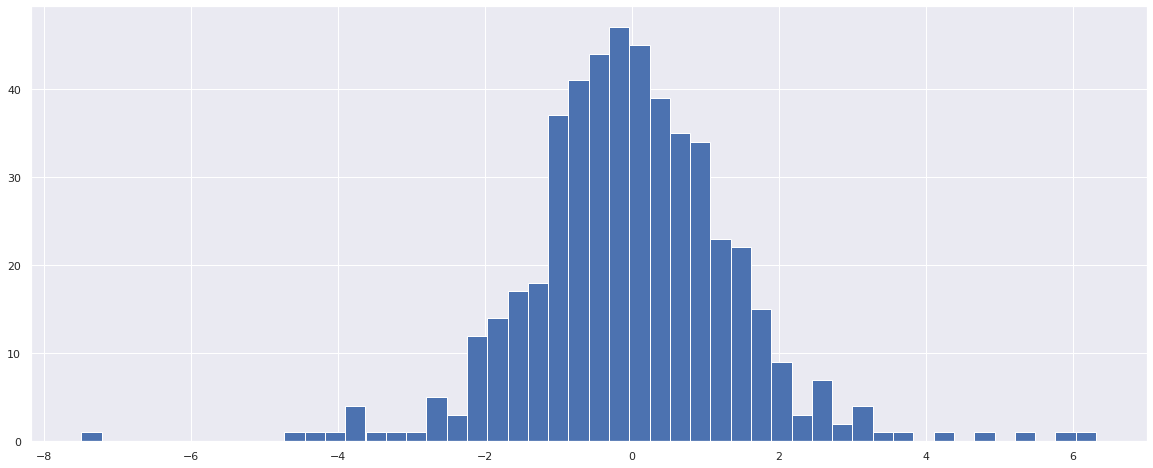

In [10]:
plt.figure(figsize=(20,8))
plt.hist(stock_df['Day_Perc_Change'],bins=50)
plt.show()

### 2.6

In [11]:
stocks = ['AXISBANK.csv','GAIL.csv','INFY.csv','TCS.csv','TITAN.csv']
close_price_df = {}
percentage_df = {}
for i in stocks:
    df = pd.read_csv(i)
    df = df[df['Series']=='EQ']
    close_price_df[i] = df['Close Price']
    df['Day_Per_Change'] = df['Close Price'].pct_change().dropna()*100
    percentage_df[i] = df['Day_Per_Change']
close_price_df = pd.DataFrame(close_price_df)
percentage_df = pd.DataFrame(percentage_df)
close_price_df.head()
percentage_df.head()

,AXISBANK.csv,GAIL.csv,INFY.csv,TCS.csv,TITAN.csv
0,NaN,NaN,NaN,NaN,NaN
1,0.279944,-0.628019,0.362566,2.708131,0.961439
2,0.259222,-0.753525,-0.230366,1.078567,-1.341388
3,-2.147971,-0.869459,0.939337,3.292810,-2.096523
4,1.971545,-0.914145,-0.395113,-1.145414,-0.106011


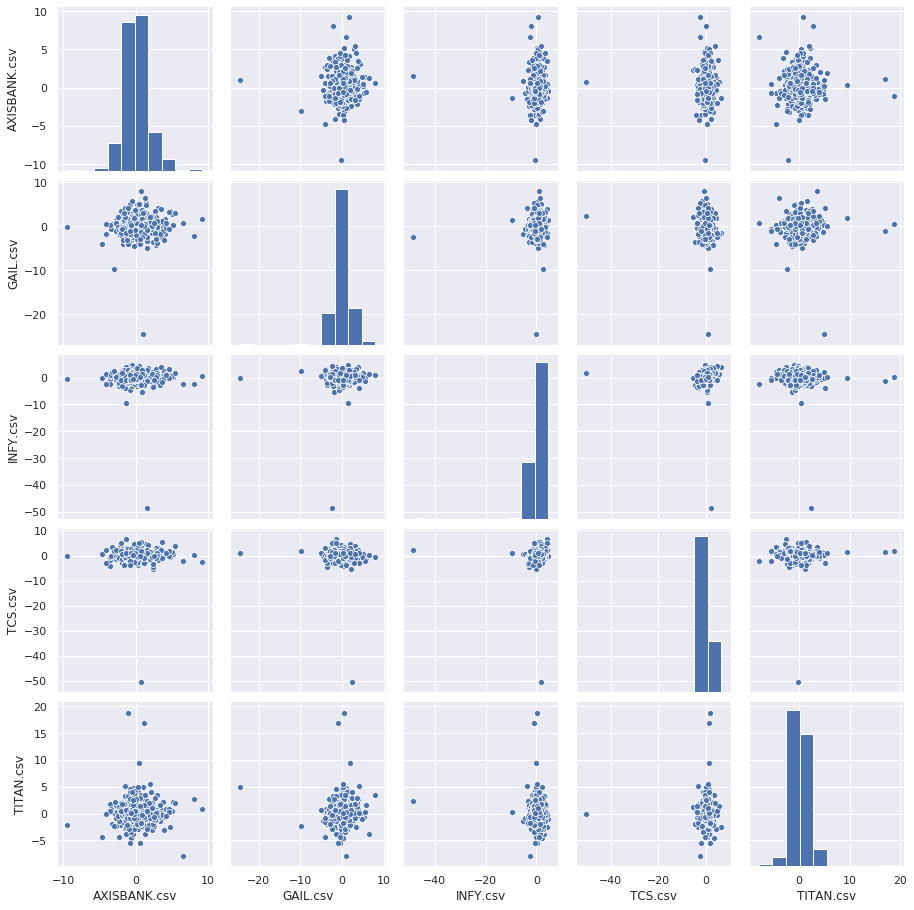

In [12]:
sns.pairplot(percentage_df)
plt.show()

### 2.7

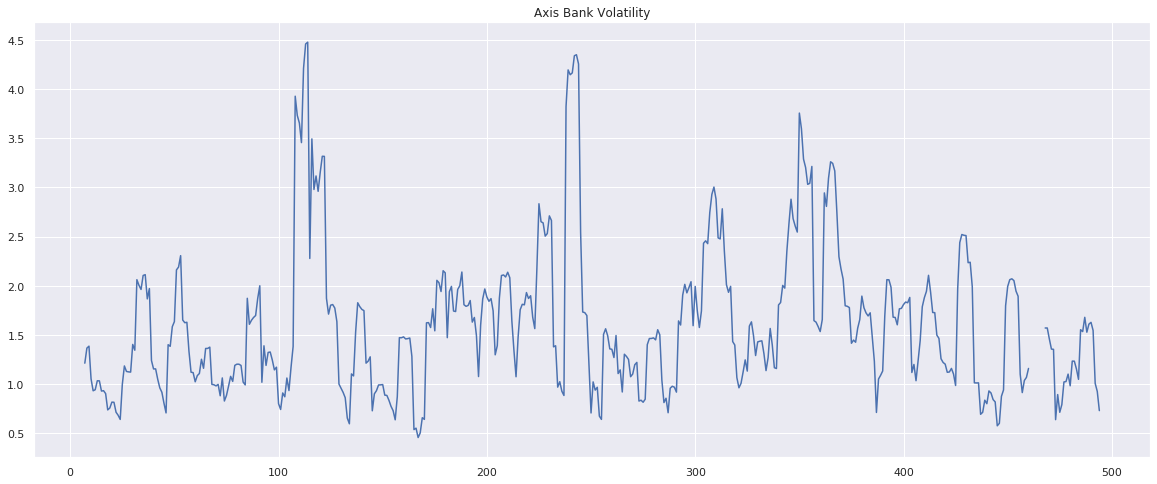

In [13]:
plt.figure(figsize=(20,8))
percentage_df['rolling_avg'] = percentage_df['AXISBANK.csv'].rolling(7).std().dropna()
plt.plot(percentage_df['rolling_avg'])
plt.title('Axis Bank Volatility')
plt.show()

### 2.8

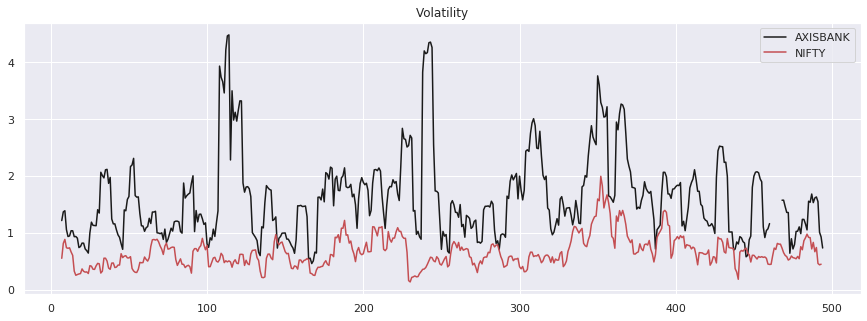

In [14]:
ndf = pd.read_csv('Nifty50.csv')
ndf['Day_Perc_Change'] = ndf['Close'].pct_change()*100
ndf['rolling_std'] = ndf['Day_Perc_Change'].rolling(7).std()
ndf = ndf.dropna()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(percentage_df.rolling_avg, 'k', label='AXISBANK')
ax.plot(ndf.rolling_std, 'r', label='NIFTY')
plt.legend()
plt.title('Volatility')
plt.show()

### 2.9

In [15]:
ndf.Date = ndf.Date.astype('datetime64[D]')
ndf['small_moving_avg'] = ndf['Close'].rolling(21).mean()
ndf['long_moving_avg'] = ndf['Close'].rolling(34).mean()
ndf['call'] = np.where(ndf.small_moving_avg>ndf.long_moving_avg,1,0)
ndf['crossing_points'] = ndf.call.diff()
ndf.drop(ndf.index[0])
# ndf.info()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,rolling_std,small_moving_avg,long_moving_avg,call,crossing_points
8,2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,1.593923,0.813855,NaN,NaN,0,0.0
9,2017-05-26,9507.75,9604.90,9495.40,9595.10,225647631,11204.36,0.897500,0.883117,NaN,NaN,0,0.0
10,2017-05-29,9560.05,9637.75,9547.70,9604.90,242266034,12484.61,0.102135,0.736272,NaN,NaN,0,0.0
11,2017-05-30,9590.65,9635.30,9581.20,9624.55,199894193,9765.40,0.204583,0.726819,NaN,NaN,0,0.0
12,2017-05-31,9636.55,9649.60,9609.25,9621.25,427053433,19605.94,-0.034287,0.735017,NaN,NaN,0,0.0
13,2017-06-01,9603.55,9634.65,9589.90,9616.10,181533283,9482.61,-0.053527,0.661813,NaN,NaN,0,0.0
14,2017-06-02,9657.15,9673.50,9637.45,9653.50,167195027,8564.30,0.388931,0.602978,NaN,NaN,0,0.0
15,2017-06-05,9656.30,9687.20,9640.70,9675.10,131685021,7192.24,0.223753,0.325592,NaN,NaN,0,0.0
16,2017-06-06,9704.25,9709.30,9630.20,9637.15,150379695,8416.55,-0.392244,0.252962,NaN,NaN,0,0.0
17,2017-06-07,9663.95,9678.55,9630.55,9663.90,165669924,8989.36,0.277572,0.265875,NaN,NaN,0,0.0


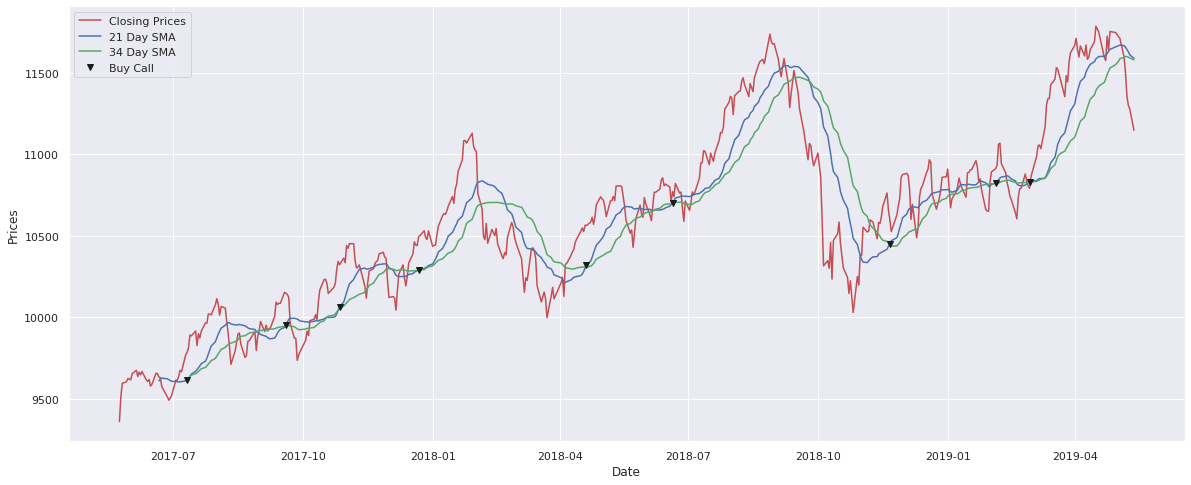

In [16]:
plt.figure(figsize=(20,8))
plt.plot(ndf.Date,ndf.Close,'r',label = 'Closing Prices')
plt.plot(ndf.Date,ndf.small_moving_avg,'b',label = '21 Day SMA')
plt.plot(ndf.Date,ndf.long_moving_avg,'g', label = '34 Day SMA')
plt.plot(ndf.Date[ndf.crossing_points==1],ndf.small_moving_avg[ndf.crossing_points==1],'kv', label = 'Buy Call')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

### 2.10

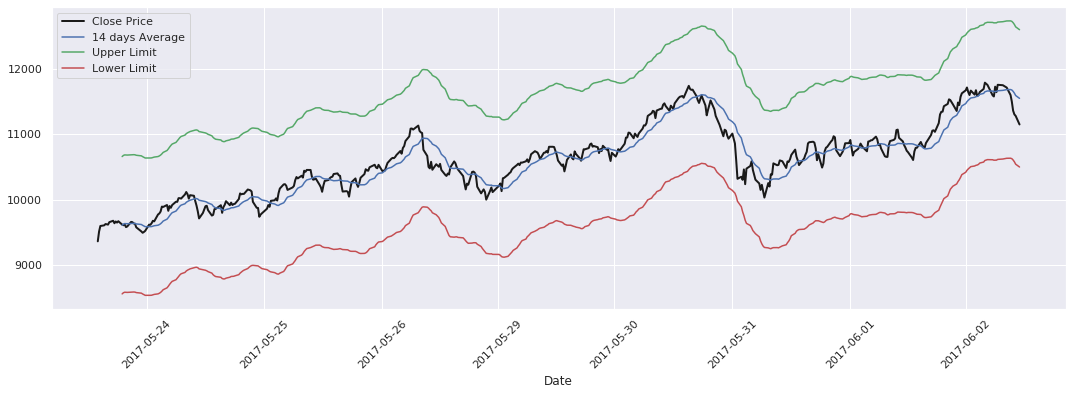

In [17]:
ndf['sma'] = ndf['Close'].rolling(14).mean()
std_ = ndf.sma.std()
ndf['upper_band'] = ndf.sma+2*std_
ndf['lower_band'] = ndf.sma-2*std_
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ndf.Date, ndf['Close'], 'k', lw=2, label='Close Price')
ax.plot(ndf.Date, ndf['sma'], 'b', label='14 days Average')
ax.plot(ndf.Date, ndf['upper_band'], 'g', label='Upper Limit')
ax.plot(ndf.Date, ndf['lower_band'], 'r', label='Lower Limit')
# ax.fill_between(ndf.Date, ndf['upper_band'], ndf['lower_band'], color='#ADCCFF')

ax.set_xlabel('Date')
plt.legend(loc=2)
plt.tight_layout()
plt.xticks(plt.xticks()[0], ndf.Date.dt.date, rotation=45)
plt.show()